# Gold Price Prediction

##### The goal of this project is to develop a machine learning model that accurately predicts daily gold prices based on historical data and market factors.

### Importing the required libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import requests
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [2]:
data=pd.read_csv("FINAL_USO.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


### Showing all the columns using pd.set_option

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,199109200,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,136930000,74.550003,76.150002,72.150002,72.900002,70.431755,787900,1.3018,1.2982,1.3051,1.2957,1,105.09,104.88,106.50,104.88,14330,1,93.42,94.91,96.00,93.33,0,53604,54248,54248,52316,119440,1,1.911,1.911,1.911,1.911,1,1414.65,1420.30,1423.35,1376.85,0,618.85,614.70,615.00,614.60,1,1425,80.341,80.565,80.630,80.130,22850,0,53.009998,53.139999,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,220481400,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,389520000,73.599998,75.099998,73.349998,74.900002,72.364037,896600,1.3035,1.3020,1.3087,1.2997,1,103.35,103.51,104.56,102.46,140080,0,93.79,93.43,94.80,92.53,1,53458,53650,54030,52890,65390,0,1.851,1.851,1.851,1.851,0,1420.25,1414.75,1431.75,1400.70,1,623.65,622.60,623.45,622.30,1,1400,80.249,80.175,80.395,79.935,13150,0,52.500000,53.180000,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,183903000,11866.54004,11925.87988,11735.19043,11766.25977,11766.25977,135170000,69.099998,69.800003,64.199997,64.699997,62.509384,2096700,1.2995,1.3043,1.3044,1.2981,0,103.64,103.63,104.57,102.37,147880,1,94.09,93.77,94.43,92.55,1,52961,53400,53400,52544,67280,0,1.810,1.810,1.810,1.810,0,1411.10,1422.65,1427.60,1404.60,0,608.80,626.00,630.00,608.60,0,1400,80.207,80.300,80.470,80.125,970,0,52.490002,52.549999,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,225418100,11769.20996,12117.12988,11768.83008,12103.58008,12103.58008,165180000,66.449997,68.099998,66.000000,67.000000,64.731514,875300,1.3079,1.3003,1.3133,1.2994,1,106.73,104.30,107.27,103.91,170240,1,95.55,96.39,99.70,96.39,1,53487,52795,53575,52595,55130,1,1.927,1.927,1.927,1.927,1,1434.75,1408.95,1436.55,1408.15,1,626.65,622.45,622.45,622.45,1,1400,80.273,80.890,80.940,80.035,22950,1,52.380001,53.250000,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,107.838242,194230900,12103.58008,12119.70020,11999.44043,12107.74023,12107.74023,163250000,67.099998,69.400002,66.900002,68.500000,66.180725,837600,1.3045,1.3079,1.3197,1.3024,0,107.71,107.15,108.17,106.16,145090,1,99.01,97.54,99.26,96.81,1,53148,53519,54184,52937,75950,0,1.970,1.970,1.970,1.970,1,1429.05,1434.40,1453.75,1417.65,0,635.90,625.70,641.50,623.80,1,1400,80.350,80.105,80.445,79.550,24140,1,53.150002,53.430000,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


### Basic concepts for the data 

- Shape
- Size
- Info
- Describe

In [6]:
data.shape

(1718, 81)

In [7]:
data.size

139158

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [9]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,192.204570,1.098026e+08,18161.094398,18244.137842,18073.889095,18164.119043,18164.119043,1.779131e+08,28.276554,28.822555,27.653655,28.209302,27.783958,1.136074e+06,1.208494,1.208531,1.213360,1.203692,0.494761,77.504523,77.521740,78.384936,76.593894,225958.585565,0.498836,70.153097,70.275396,71.120256,69.330990,0.503492,43284.478463,43308.692084,43671.194412,42911.912107,26912.462165,0.480792,2.262769,2.263091,2.286512,2.238765,0.490105,1183.915425,1184.388853,1194.274622,1173.409692,0.484284,766.805122,766.363481,773.529302,759.444208,0.530850,1130.442375,89.809427,89.805442,90.098981,89.509331,27568.300349,0.512806,26.747427,27.071304,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,48.514161,4.925110e+07,3889.752079,3906.008604,3867.959072,3884.495887,3884.495887,1.212753e+08,20.325861,20.620624,19.972314,20.294635,19.721857,7.301289e+05,0.100535,0.100579,0.100184,0.100695,0.500118,27.400703,27.366113,27.393294,27.322868,88844.540581,0.500144,23.471514,23.480047,23.494737,23.422198,0.500133,7530.704012,7550.423242,7614.302267,7443.076538,21880.969122,0.499776,0.433469,0.433977,0.437574,0.429960,0.500048,273.842095,273.978168,275.427791,271.799909,0.499898,148.307189,148.078365,149.010291,147.381087,0.499193,570.012881,7.516115,7.520788,7.567895,7.459269,14643.314699,0.499982,10.620552,10.706388,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,104.468536,2.785650e+07,11769.209960,11925.879880,11735.190430,11766.259770,11766.259770,8.410000e+06,2.770000,2.850000,2.730000,2.800000,2.800000,1.645000e+05,1.038700,1.039000,1.041900,1.034100,0.000000,27.880000,27.990000,28.750000,27.100000,11520.000000,0.000000,26.550000,27.340000,27.610000,26.180000,0.000000,33170.000000,33146.000000,33566.000000,32626.000000,40.000000,0.000000,1.358000,1.366000,1.391000,1.321000,0.000000,775.600000,765.300000,786.500000,756.000000,0.000000,470.4500

### Removing the unwanted columns

In [10]:
data.drop('Date',axis=1,inplace=True)

### Checking the Null values

In [12]:
data.isna().sum().head(40)

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
SP_open       0
SP_high       0
SP_low        0
SP_close      0
SP_Ajclose    0
SP_volume     0
DJ_open       0
DJ_high       0
DJ_low        0
DJ_close      0
DJ_Ajclose    0
DJ_volume     0
EG_open       0
EG_high       0
EG_low        0
EG_close      0
EG_Ajclose    0
EG_volume     0
EU_Price      0
EU_open       0
EU_high       0
EU_low        0
EU_Trend      0
OF_Price      0
OF_Open       0
OF_High       0
OF_Low        0
OF_Volume     0
OF_Trend      0
OS_Price      0
OS_Open       0
OS_High       0
OS_Low        0
OS_Trend      0
dtype: int64

### we have to scale the value using standard scaler to make the data in 
### particular data range like (0 to 1)

In [13]:
X = data.drop('USO_Adj Close',axis=1)
y = data['USO_Adj Close']

### Importing all the machine learnings library using scikit learn modules

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Standard Scaler

In [19]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

### Linear Regressor

In [23]:
lr = LinearRegression()
lr.fit(X_train_scaler,y_train)
y_pred_lr = lr.predict(X_test_scaler)
print('mae :',mean_absolute_error(y_test,y_pred_lr))
print(' :',mean_squared_error(y_test,y_pred_lr))
print('R2 Score :',r2_score(y_test,y_pred_lr)*100)

mae : 2.9167882579512544e-14
 : 1.179890541777905e-27
R2 Score : 100.0


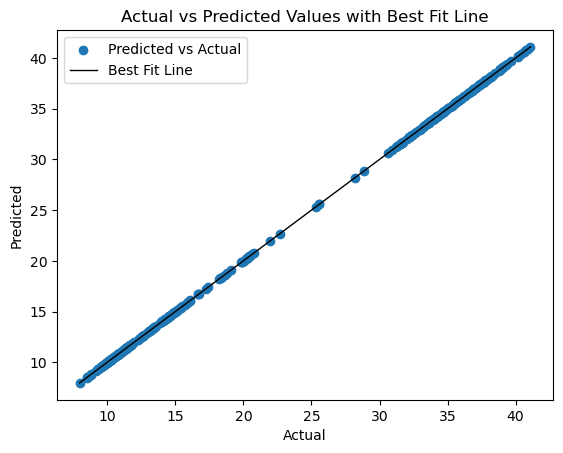

In [24]:
plt.scatter(y_test,y_pred_lr, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],color='black', linewidth=1, label='Best Fit Line')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values with Best Fit Line')
plt.legend()
plt.show()

### Decision Tree

In [26]:
dt = DecisionTreeRegressor()
dt.fit(X_train_scaler,y_train)
y_pred_dt = dt.predict(X_test_scaler)
print('mae :',mean_absolute_error(y_test,y_pred_dt))
print('mse :',mean_squared_error(y_test,y_pred_dt))
print('R2 Score :',r2_score(y_test,y_pred_dt)*100)

mae : 0.043604563953488294
mse : 0.008930244012825599
R2 Score : 99.99331244786487


### Random Forest Regressor

In [28]:
rf = RandomForestRegressor()
rf.fit(X_train_scaler,y_train)
y_pred_rf = rf.predict(X_test_scaler)
print('mae :',mean_absolute_error(y_test,y_pred_rf))
print('mse :',mean_squared_error(y_test,y_pred_rf))
print('R2 Score :',r2_score(y_test,y_pred_rf)*100)

mae : 0.03109823965116257
mse : 0.005596042125891112
R2 Score : 99.99580931680998


### Svm

In [30]:
svm = SVM(kernel='linear')
svm.fit(X_train_scaler,y_train)
y_pred_svm = svm.predict(X_test_scaler)
print('mae :',mean_absolute_error(y_test,y_pred_svm))
print('mse :',mean_squared_error(y_test,y_pred_svm))
print('R2 Score :',r2_score(y_test,y_pred_svm)*100)

mae : 0.04732901790279755
mse : 0.003917693637317172
R2 Score : 99.99706617418165


### KNN

In [31]:
knn = KNeighborsRegressor()
knn.fit(X_train_scaler,y_train)
y_pred_knn = knn.predict(X_test_scaler)
print('mae :',mean_absolute_error(y_test,y_pred_knn))
print('mse :',mean_squared_error(y_test,y_pred_knn))
print('R2 Score :',r2_score(y_test,y_pred_knn))

mae : 0.7809360093023258
mse : 1.0463649442520546
R2 Score : 0.9921641333573772


In [34]:
for i in range(1,22):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train_scaler,y_train)
    y_pred_knn = knn.predict(X_test_scaler)
    print('mae :',mean_absolute_error(y_test,y_pred_knn))
    print('mse :',mean_squared_error(y_test,y_pred_knn))
    print('R2 Score :',r2_score(y_test,y_pred_knn))

mae : 0.8303778720930236
mse : 1.5333266954082099
R2 Score : 0.9885174445390268
mae : 0.8065261686046511
mse : 1.3231653316871366
R2 Score : 0.9900912706009533
mae : 0.792093031007752
mse : 1.1247729617839297
R2 Score : 0.991576962722058
mae : 0.7726962354651162
mse : 1.0034730882240903
R2 Score : 0.9924853356928873
mae : 0.7809360093023258
mse : 1.0463649442520546
R2 Score : 0.9921641333573772
mae : 0.7816278788759694
mse : 1.0401181310635241
R2 Score : 0.9922109135896046
mae : 0.8107184165282392
mse : 1.0981361482744498
R2 Score : 0.9917764366432661
mae : 0.811075534520349
mse : 1.0882239575580603
R2 Score : 0.9918506656252446
mae : 0.8159398565891472
mse : 1.1007549026845636
R2 Score : 0.9917568256935299
mae : 0.8280522790697676
mse : 1.1154083947095386
R2 Score : 0.9916470907392129
mae : 0.8286125192917548
mse : 1.1175763397658487
R2 Score : 0.9916308557454441
mae : 0.8290866676356592
mse : 1.10264990697191
R2 Score : 0.9917426346591643
mae : 0.8340853714221826
mse : 1.114132949243